In [1]:
library(MetaNeighbor)
library(Seurat)
library(SingleCellExperiment)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
“package ‘matrixStats’ was built under R version 4.2.3”

Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colM

In [8]:
bg <-readRDS('/data/work/5month_Tel/GABA/10_Tel_GABA_annotated_!Inh_16_19_28.rds')

In [9]:
library(gplots)
library(RColorBrewer)

In [10]:
sce <- as.SingleCellExperiment(bg)

In [11]:
table(sce$GABA_level_subcelltype)


 Inh_1  Inh_2  Inh_3  Inh_4  Inh_5  Inh_6  Inh_7  Inh_8  Inh_9 Inh_10 Inh_11 
  8214   4209   6756   3257   2644   2336   5425   1956   2789   1610   2879 
Inh_12 Inh_13 Inh_14 Inh_15 Inh_16 Inh_17 Inh_18 Inh_19 Inh_20 Inh_21 Inh_22 
  1421   2002   1350   2269      0    969    969      0    601    594    579 
Inh_23 Inh_24 Inh_25 Inh_26 Inh_27 Inh_28 
   482    310    288    230    160      0 

In [12]:
global_hvgs <- variableGenes(dat=sce,exp_labels=sce$Region_1)
length(global_hvgs)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”


[1] 4089

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.7 GiB”


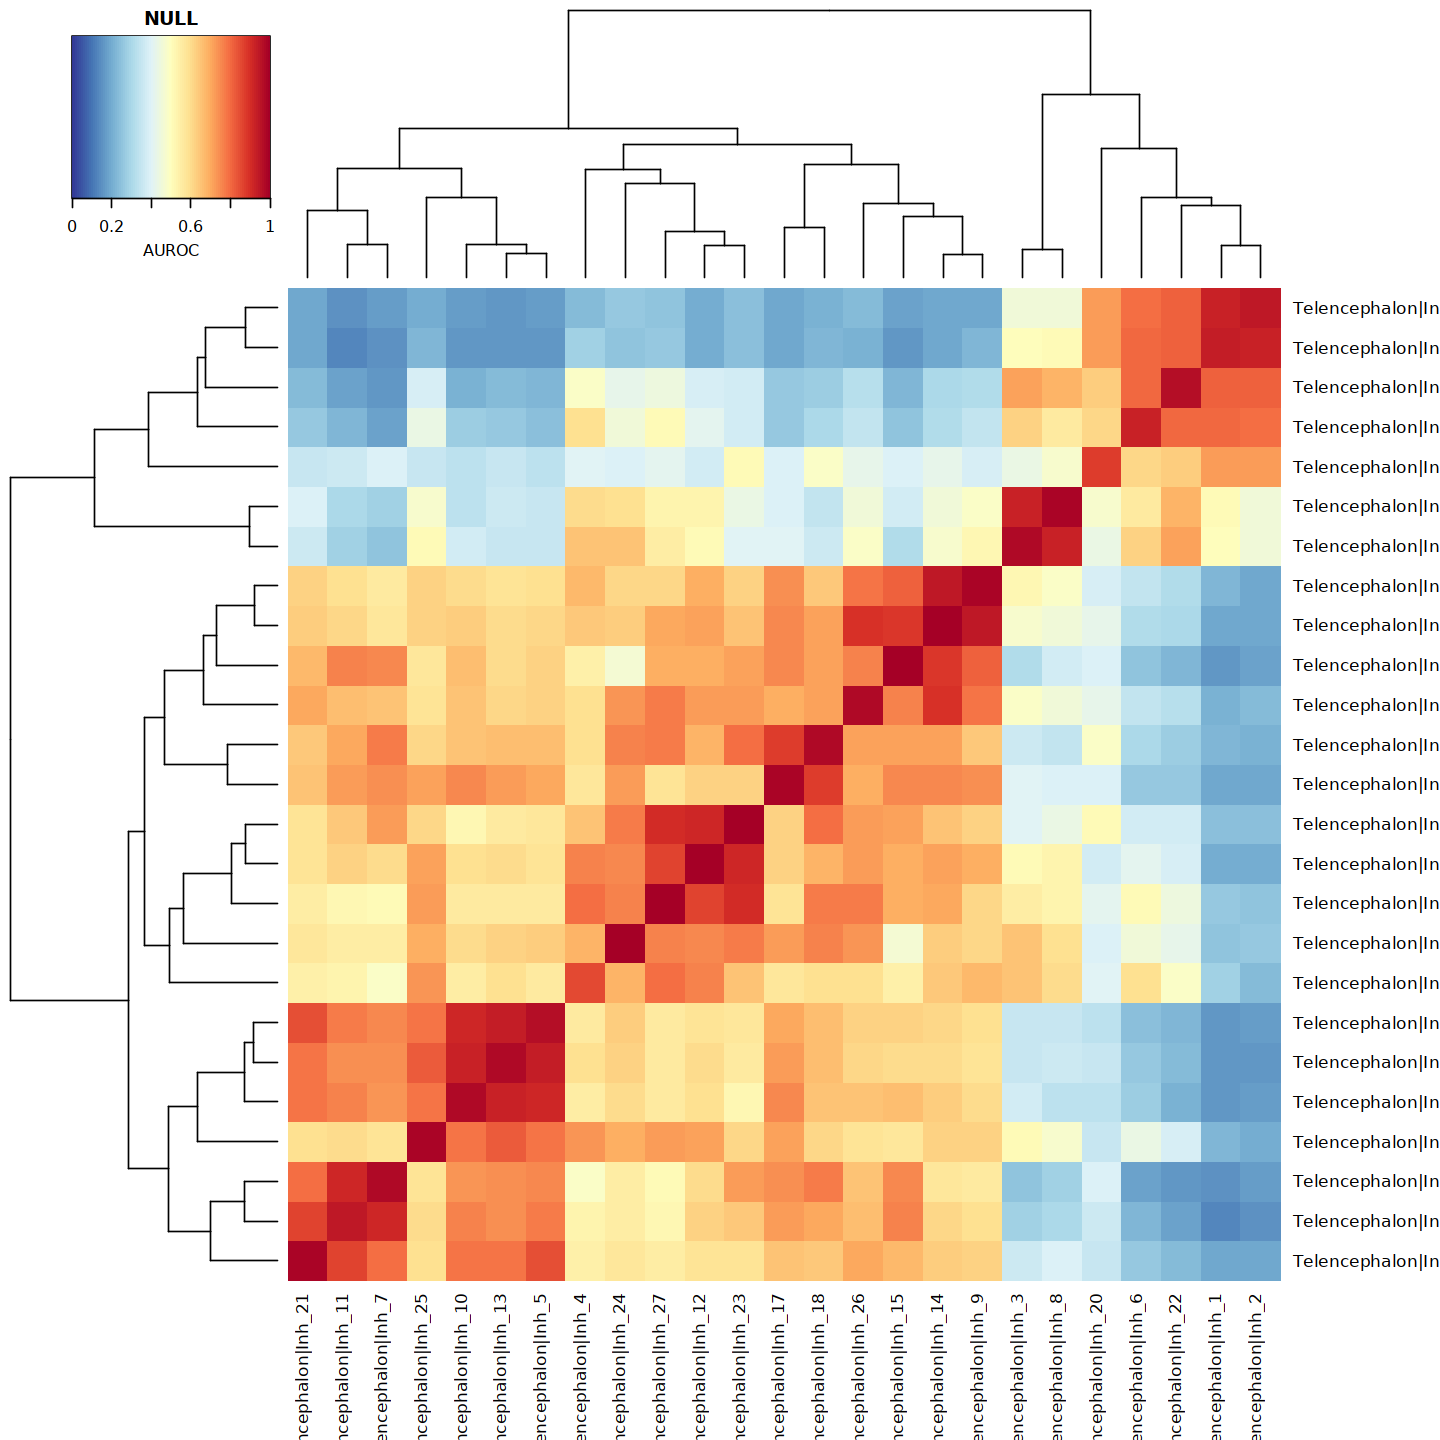

In [13]:
aurocs <- MetaNeighborUS(var_genes = global_hvgs,

                         dat = sce ,

                         study_id = sce$Region_1,

                         cell_type = sce$GABA_level_subcelltype,

                         fast_version=TRUE)
options(repr.plot.width = 12, repr.plot.height = 12)

plotHeatmap(aurocs)

In [22]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [14]:
pdf("/data/work/5month_Tel/GABA/GABA_metaneighbor2.pdf", width = 12, height = 12)

# 创建热图
plotHeatmap(aurocs)

# 关闭PDF设备
dev.off()

png 
  2

In [15]:
write.csv(aurocs, file = "/data/work/5month_Tel/GABA/corr_Tel_GABA_pancreas2.csv", sep = '\t', row.names = TRUE)

Warning message in write.csv(aurocs, file = "/data/work/5month_Tel/GABA/corr_Tel_GABA_pancreas2.csv", :
“attempt to set 'sep' ignored”
